# El Problema de la caja de fósforos de Banach

El célebre matemático polaco Stefan Banach solía reunirse con otros matemáticos en el Café Escocés en Lwów, Polonia, en donde había un cuaderno en el cual se anotaban los problemas planteados y sus soluciones. Esta libreta se conoce como el Libro Escocés. (El siguiente es el último problema incluido en este libro).

En todo momento, Banach lleva $2$ cajas de fósforos: $1$ en su bolsillo izquierdo y $1$ en su bolsillo derecho. Cada vez que necesita un fósforo, es igualmente probable que lo saque de cualquier bolsillo. Considere el momento en que Banach descubre por primera vez que una de sus cajas de fósforos está vacía. <font color=red>Banach descubre que alguna de las cajetillas está vacía solo cuando vuelve a abrirla una vez que ésta se ha vaciado la última vez que abrió la misma caja.</font>
 
1. Si se supone que ambas cajas de fósforos inicialmente contenían $N$ fósforos, ¿cuál es la probabilidad de que haya exactamente $k$ fósforos, $k=0,1,\dots, N$, en la otra caja?
2.	Resuelve el problema de la caja de fósforos de Banach cuando la caja de fósforos de la izquierda contenía originalmente $N_1$ fósforos y la caja de la derecha contenía $N_2$ fósforos.
3.	Encuentra la probabilidad de que, en el momento en que se vacía la primera caja (en lugar de decubrirse vacía), la otra caja contenga exactamente $k$ fósforos.



## Simulación en Python

In [2]:
n=10 # el número de fósforos en las cajetillas

#c0=[0 for i in range(n)]

c0=[0,]*n # la cajita de fósforos 0
c1=[1,]*n # la cajita de fósforos 1

print(c0)
print(c1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [3]:
import random

n=10 # el número de fósforos en las cajetillas

#c0=[0 for i in range(n)]

c0=[0,]*n # la cajita de fósforos 0
c1=[1,]*n # la cajita de fósforos 1

c=[c0,c1]

p=random.choice(c) # Elegimos una de las cajitas
e=random.choice(p) # Elegimos un fósforo de la cajita elegida antes

if e==0:
    c0.remove(e)
else:
    c1.remove(e)
    
print(c0)
print(c1)


[0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
import random

n=10 # el número de fósforos en las cajetillas

#c0=[0 for i in range(n)]

c0=[0,]*n # la cajita de fósforos 0
c1=[1,]*n # la cajita de fósforos 1

c=[c0,c1]

#while len(c0)>0 and len(c1)>0: 
while c0 and c1:
    e=random.choice(random.choice(c))
    if e==0:
        c0.remove(e)
    else:
        c1.remove(e)
        
    c=[c0,c1]
        
print(c0)
print(c1)

[0, 0]
[]


cuántos fósforos usa Banach?

In [5]:
import random

n=10 # el número de fósforos en las cajetillas

#c0=[0 for i in range(n)]

c0=[0,]*n # la cajita de fósforos 0
c1=[1,]*n # la cajita de fósforos 1

c=[c0,c1]

# Hay que poner un contador de fósforos usados
t=0

#while len(c0)>0 and len(c1)>0: 
while c0 and c1:
    e=random.choice(random.choice(c))
    if e==0:
        c0.remove(e)
    else:
        c1.remove(e)
        
    c=[c0,c1]
    t+=1
        
print(c0)
print(c1)
print(t)

[]
[1, 1, 1, 1, 1]
15


In [6]:
import random

def banach(n):
    c0=[0,]*n # la cajita de fósforos 0
    c1=[1,]*n # la cajita de fósforos 1
    c=[c0,c1]
    t=0
    while c0 and c1:
        e=random.choice(random.choice(c))
        if e==0:
            c0.remove(e)
        else:
            c1.remove(e)

        c=[c0,c1]
        t+=1
        
    if c0:
        return 0,t,len(c0)
    else:
        return 1,t,len(c1)
    


In [7]:
B=banach(10)

print("Banach usó",B[1],"fósforos antes de vaciar la cajetilla",1-B[0])
print("La cajita",B[0],"quedó con",B[2],"fosforos")

Banach usó 14 fósforos antes de vaciar la cajetilla 1
La cajita 0 quedó con 6 fosforos


Pero el problema es muy específico: No se trata de saber cuántas cerillas (o cuantos cigarros) ha usado Banach, sino el momento en que Banach descubre que alguna de las cajetillas se ha vacíado.

Cualquiera de las cajetillas puede quedar vacía y Banach puede incluso seguir usando fósforos de la otra caja y seguir fumando, mientras no sé de cuenta de que una caja está vacía.

In [8]:
import random

def banach(n):
    c0=[0,]*(n+1) # la cajita de fósforos 0
    c1=[1,]*(n+1) # la cajita de fósforos 1
    c=[c0,c1]
    # contador del momento en que Banach descubre que alguna de las cajitas está vacía
    t=0
    while c0 and c1:
        e=random.choice(random.choice(c))
        if e==0:
            c0.remove(e)
        else:
            c1.remove(e)

        c=[c0,c1]
        t+=1
        
    if c0:
        return 0,t,len(c0)-1
    else:
        return 1,t,len(c1)-1

In [9]:
B=banach(10)

print("Banach intentó sacar", B[1],"fósfortos antes de darse cuenta que había vaciado la cajetilla",abs(B[0]-1))
print("La cajetilla",B[0],"quedó con",B[2],"fósforo")

Banach intentó sacar 18 fósfortos antes de darse cuenta que había vaciado la cajetilla 0
La cajetilla 1 quedó con 3 fósforo


## Ejercicio

Agregar un contador que cuente el momento en que Banach se da cuenta de que alguna de las cajitas de fósforos queda vacía.

In [10]:
import random

'''
Esta función hará todo el trabajo por nosotros
@param n Es el número de cerillos con el que se llevará a cabo la simualción
@return Un diccionario que contiene los datos del experimento
'''
def banach(n):
    c0=[0,]*(n+1) # La cajita de fósforos 0
    c1=[1,]*(n+1) # la cajita de fósforos 1
    c = [c0,c1]
    t = 0
    while c0 and c1:
        #Elegimos una cajita y de ella el cerillo
        e = random.choice(random.choice(c)) 
        #Vamos removiendo cerillos hasta que la caja se vacíe
        if e==0:
            c0.remove(e)
        else:
            c1.remove(e)
        c=[c0,c1] 
        t +=1
    
    if c0:
        return 0,t,len(c0)-1
    else:
        return 1,t,len(c1)-1

In [11]:
B = banach(10)

print("Banach usó", B[1]-1, "fósforos antes de vaciar la cajita", 1-B[0])
print("La cajita", B[0], "quedó con", B[2], "fósforos")
print("Banach se dio cuenta de que la cajita", 1-B[0], "se quedó vacía cuando quiso sacar el", B[1],"-avo fósforo")
print("(Que no pudo sacarlo porque la cajita", 1-B[0], "ya estaba vacía)")

Banach usó 18 fósforos antes de vaciar la cajita 0
La cajita 1 quedó con 2 fósforos
Banach se dio cuenta de que la cajita 0 se quedó vacía cuando quiso sacar el 19 -avo fósforo
(Que no pudo sacarlo porque la cajita 0 ya estaba vacía)


## Ejercicio

Haz un gráfico de barras para un número arbitrario $n$ de simulaciones de este problema (considera un número de fósforos fijo igual a $10$). Cada barra debe reprersentar la frecuencia relativa de la cantidad de cerillos restantes que quedan en la caja no vacía. Observése que una vez que alguna de las cajas se ha vaciado, en la otra caja solo puede quedar 0 o bien 1, 2, 3, 4, 5, 6, 7, 8, 9 ó 10 cerillas. Tienes hasta la media noche de hoy.

In [7]:
import random
from collections import defaultdict

n=50000 # número total de repeticiones (Número arbitrario de simulaciones del problema)
r=0      # repetición actual
f=10
F = defaultdict(int)

while r<n:
    c0=[0,]*(f+1) # La cajita de fósforos 0 PUNTO CLAVE
    c1=[1,]*(f+1) # la cajita de fósforos 1
    c = [c0,c1]
    t=0
    while c0 and c1: #Esto es más rápido, Python ya sabe lo que quieres hacer :o
        e = random.choice(random.choice(c)) #Primero elije una cajita, y de esa cajita sale un cerillo
        if e==0:
            c0.remove(e)
        else:
            c1.remove(e)
        c=[c0,c1] #Y después se actualiza la lista de cajitas, y se repite hasta que alguna caja "se vacíe"
        t +=1
    
    if c0: #Esto es igual a "if len(c0)>0:"
        a = [0,t,len(c0)-1]
    else:
        a = [1,t,len(c1)-1]
    #print("La cajita de fósforos no vacía se quedó con", a[2], "fósforos.") #Esta línea se repite por cada valor de "n"
    S = (str(a[2]), "fósforos")
    S = tuple(S)
    F[S] +=1
    r+=1

print(F.items())
F=sorted(F.items())
print()
print(F)

dict_items([(('4', 'fósforos'), 6087), (('0', 'fósforos'), 8813), (('1', 'fósforos'), 8762), (('3', 'fósforos'), 7566), (('2', 'fósforos'), 8298), (('5', 'fósforos'), 4515), (('8', 'fósforos'), 847), (('7', 'fósforos'), 1733), (('6', 'fósforos'), 3077), (('9', 'fósforos'), 255), (('10', 'fósforos'), 47)])

[(('0', 'fósforos'), 8813), (('1', 'fósforos'), 8762), (('10', 'fósforos'), 47), (('2', 'fósforos'), 8298), (('3', 'fósforos'), 7566), (('4', 'fósforos'), 6087), (('5', 'fósforos'), 4515), (('6', 'fósforos'), 3077), (('7', 'fósforos'), 1733), (('8', 'fósforos'), 847), (('9', 'fósforos'), 255)]


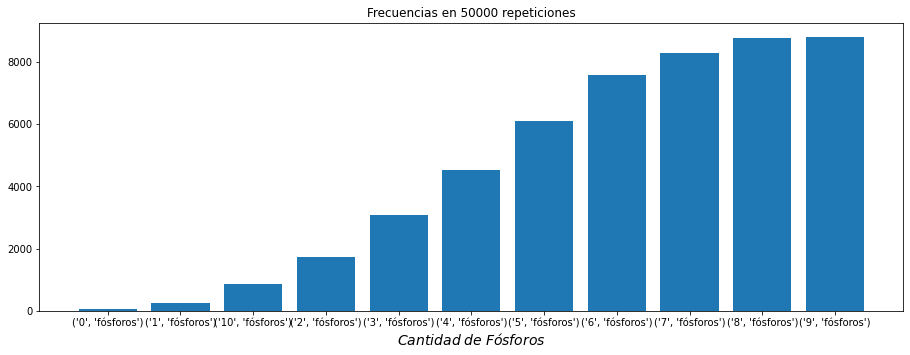

In [13]:
#Usamos el código que ya conocíamos para graficar:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
resultado = [str(i) for i,j in F]
resultado.sort()
frecuencia = [j for i,j in F]
frecuencia.sort()
ax.bar(resultado,frecuencia)
plt.xlabel("$Cantidad \;de\; Fósforos$",fontsize=14)
plt.title("Frecuencias en "+str(r)+" repeticiones")
plt.show()

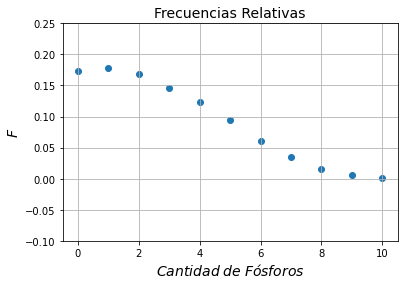

In [12]:
import random
import matplotlib.pyplot as plt


def banach(n):
    c0=[0,]*(n+1) # la cajita de fósforos 0
    c1=[1,]*(n+1) # la cajita de fósforos 1
    c=[c0,c1]
    # contador del momento en que Banach descubre que alguna de las cajitas está vacía
    t=0
    while c0 and c1:
        e=random.choice(random.choice(c))
        if e==0:
            c0.remove(e)
        else:
            c1.remove(e)

        c=[c0,c1]
        t+=1
        
    if c0:
        return 0,t,len(c0)-1
    else:
        return 1,t,len(c1)-1


n = 10 
frecuencias = {i:0 for i in range(0, 11)}
simulaciones = 50000 

for i in range(0, simulaciones): 
  B = banach(n)
  frecuencias[B[2]]+=1

for var in frecuencias: 
  frecuencias[var] = frecuencias[var]/simulaciones 

plt.scatter(x=frecuencias.keys(), y=frecuencias.values())
plt.ylim(-0.1,0.25)
plt.grid()
plt.xlabel("$Cantidad \;de\; Fósforos$",fontsize=14)
plt.ylabel("$F$",fontsize=14)
plt.title("Frecuencias Relativas",fontsize=14)
plt.show()